In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"D:\Data Analysis_Bootcamp\Data Mining Project\car_evaluation_with_missing_values.csv" , header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh.1,2,2.1,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,NaN,vhigh,2,2,med,NaN,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
# Adding headers to the dataset
new_headers = ['buying_price' , 'maitenance_cost' , 'num_of_doors' , 'num_of_persons' , 'lug_boot' , 'safety' , 'Decision']
df.columns = new_headers
df.head()

,buying_price,maitenance_cost,num_of_doors,num_of_persons,lug_boot,safety,Decision
0,vhigh,vhigh.1,2,2.1,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,NaN,vhigh,2,2,med,NaN,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
# Chicking Data Types Of The Columns
print(df.dtypes)

buying_price       object
maitenance_cost    object
num_of_doors       object
num_of_persons     object
lug_boot           object
safety             object
Decision           object
dtype: object


In [16]:
# Removing Duplicate values
df.drop_duplicates()
df.describe()

,buying_price,maitenance_cost,num_of_doors,num_of_persons,lug_boot,safety,Decision
count,1558,1555,1565,1543,1555,1563,1549
unique,4,5,4,4,3,3,4
top,high,vhigh,5more,2,big,med,unacc
freq,398,391,396,519,526,527,1078


In [17]:
# Chicking If There Is Any Missing Values
missing_values = df.isnull().sum()
print(missing_values)

buying_price       170
maitenance_cost    173
num_of_doors       163
num_of_persons     185
lug_boot           173
safety             165
Decision           179
dtype: int64


In [18]:
# Handling with missing values with (MODE) Techneque for categorical columns
most_frequent = df['buying_price'].mode()[0]
df['buying_price']  =df['buying_price'].fillna(most_frequent)
df['buying_price']

0       vhigh
1       vhigh
2       vhigh
3        high
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying_price, Length: 1728, dtype: object

In [19]:
most_frequent = df['maitenance_cost'].mode()[0]
df['maitenance_cost']  =df['maitenance_cost'].fillna(most_frequent)
df['maitenance_cost']

0       vhigh.1
1         vhigh
2         vhigh
3         vhigh
4         vhigh
         ...   
1723        low
1724        low
1725        low
1726        low
1727        low
Name: maitenance_cost, Length: 1728, dtype: object

In [20]:
most_frequent = df['lug_boot'].mode()[0]
df['lug_boot']  =df['lug_boot'].fillna(most_frequent)
df['lug_boot']

0       small
1       small
2       small
3         med
4         med
        ...  
1723      med
1724      med
1725      big
1726      big
1727      big
Name: lug_boot, Length: 1728, dtype: object

In [21]:
most_frequent = df['safety'].mode()[0]
df['safety']  =df['safety'].fillna(most_frequent)
df['safety']

0        low
1        med
2       high
3        med
4        med
        ... 
1723     med
1724    high
1725     low
1726     med
1727     med
Name: safety, Length: 1728, dtype: object

In [22]:
most_frequent = df['Decision'].mode()[0]
df['Decision']  =df['Decision'].fillna(most_frequent)
df['Decision']

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Decision, Length: 1728, dtype: object

In [24]:
df['num_of_doors'] = df['num_of_doors'].replace('5more', 5)
df['num_of_persons'] = df['num_of_persons'].replace('more', 5)

In [25]:
# Dealing with numeric values with (mean techneque)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['num_of_doors', 'num_of_persons']] = imputer.fit_transform(df[['num_of_doors', 'num_of_persons']])
df

,buying_price,maitenance_cost,num_of_doors,num_of_persons,lug_boot,safety,Decision
0,vhigh,vhigh.1,2.0,2.1,small,low,unacc
1,vhigh,vhigh,2.0,2.0,small,med,unacc
2,vhigh,vhigh,2.0,2.0,small,high,unacc
3,high,vhigh,2.0,2.0,med,med,unacc
4,vhigh,vhigh,2.0,2.0,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5.0,5.0,med,med,good
1724,low,low,5.0,5.0,med,high,vgood
1725,low,low,5.0,5.0,big,low,unacc
1726,low,low,5.0,5.0,big,med,good


In [26]:
df['num_of_doors'] = df['num_of_doors'].astype(int)
df['num_of_persons'] = df['num_of_persons'].astype(int)
df

,buying_price,maitenance_cost,num_of_doors,num_of_persons,lug_boot,safety,Decision
0,vhigh,vhigh.1,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,high,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [27]:
# Chicking If There Is Any Missing Values
missing_values = df.isnull().sum()
print(missing_values)

buying_price       0
maitenance_cost    0
num_of_doors       0
num_of_persons     0
lug_boot           0
safety             0
Decision           0
dtype: int64


In [28]:
# Missing values handeled :)

In [29]:
# Chickung the data if balance or imbalance

class_count = df['Decision'].value_counts()
print(class_count)
print('-------------------------------------')

Decision
unacc    1257
acc       350
vgood      61
good       60
Name: count, dtype: int64
-------------------------------------


<AxesSubplot: title={'center': 'Over-sampling: Balanced Classes'}, xlabel='Decision'>

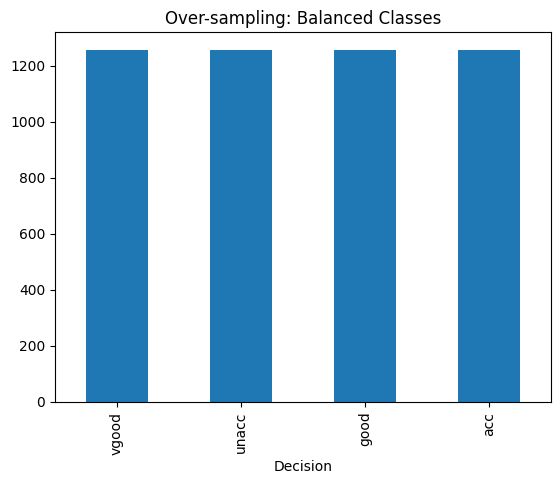

In [41]:
from sklearn.utils import resample

# classes count
count_class_unacc, count_class_acc , count_class_vgood , count_class_good = df.Decision.value_counts()

# divide the data by class
df_class_unacc = df[df['Decision'] == 'unacc']
df_class_acc = df[df['Decision'] == 'acc']
df_class_vgood = df[df['Decision'] == 'vgood']
df_class_good = df[df['Decision'] == 'good']

# Find the size of the largest class (here, the majority class)
max_class_size = max(len(df_class_unacc), len(df_class_acc), len(df_class_vgood), len(df_class_good))

# Perform over-sampling for each class that is smaller than the largest class
if len(df_class_unacc) < max_class_size:
    df_class_unacc = df_class_unacc.sample(n=max_class_size, replace=True, random_state=42)
if len(df_class_acc) < max_class_size:
    df_class_acc = df_class_acc.sample(n=max_class_size, replace=True, random_state=42)
if len(df_class_vgood) < max_class_size:
    df_class_vgood = df_class_vgood.sample(n=max_class_size, replace=True, random_state=42)
if len(df_class_good) < max_class_size:
    df_class_good = df_class_good.sample(n=max_class_size, replace=True, random_state=42)

# Combine all the classes back into a balanced dataset
df = pd.concat([df_class_unacc, df_class_acc, df_class_vgood, df_class_good])

# Shuffle the data to avoid any order bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot the class distribution after over-sampling
df.Decision.value_counts().plot(kind='bar', title='Over-sampling: Balanced Classes')

In [42]:
class_count = df['Decision'].value_counts()
print(class_count)
print('-------------------------------------')

Decision
vgood    1257
unacc    1257
good     1257
acc      1257
Name: count, dtype: int64
-------------------------------------


In [43]:
# encode columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['buying_price', 'maitenance_cost', 'lug_boot', 'safety']

# Create a dictionary to store encoders for each column (useful for inverse transformation later)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()  # Initialize a LabelEncoder
    df[col] = le.fit_transform(df[col])  # Fit and transform the column
    label_encoders[col] = le  # Store the encoder for future use
print(df.head())

   buying_price  maitenance_cost  num_of_doors  num_of_persons  lug_boot  \
0             2                2             4               4         1   
1             1                3             5               4         0   
2             1                1             5               2         0   
3             1                1             4               4         2   
4             1                2             3               4         0   

   safety Decision  
0       0    vgood  
1       0    vgood  
2       1    unacc  
3       1    unacc  
4       2     good  


In [45]:
df.head()

,buying_price,maitenance_cost,num_of_doors,num_of_persons,lug_boot,safety,Decision
0,2,2,4,4,1,0,vgood
1,1,3,5,4,0,0,vgood
2,1,1,5,2,0,1,unacc
3,1,1,4,4,2,1,unacc
4,1,2,3,4,0,2,good


In [38]:
# now Data is ready for kNN classifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [47]:
# Select predictors and target
input = df[['buying_price', 'maitenance_cost', 'num_of_doors', 'num_of_persons', 'lug_boot', 'safety']]
output = df['Decision']

# Split the dataset into training and testing sets
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=None)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(input_train, output_train)

# Make predictions
output_pred = knn.predict(input_test)

# Evaluate the model
accuracy = accuracy_score(output_test, output_pred)
print('Accuracy : ', accuracy)

# Step 2: Add Hyperparameter Tuning Here
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit the GridSearchCV
grid_search.fit(input_train, output_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 3: Use the best parameters for final training
best_knn = grid_search.best_estimator_
best_knn.fit(input_train, output_train)
final_accuracy = best_knn.score(input_test, output_test)
print('Final Model Accuracy: ', final_accuracy)


Accuracy :  0.8817097415506958
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Score: 0.8995540928895893
Final Model Accuracy:  0.9214711729622267


Confusion Matrix:
[[217  15   9  15]
 [  3 245   0   1]
 [ 52   8 159  10]
 [  0   6   0 266]]

Classification Report:
              precision    recall  f1-score   support

       unacc       0.80      0.85      0.82       256
         acc       0.89      0.98      0.94       249
       vgood       0.95      0.69      0.80       229
        good       0.91      0.98      0.94       272

    accuracy                           0.88      1006
   macro avg       0.89      0.88      0.88      1006
weighted avg       0.89      0.88      0.88      1006



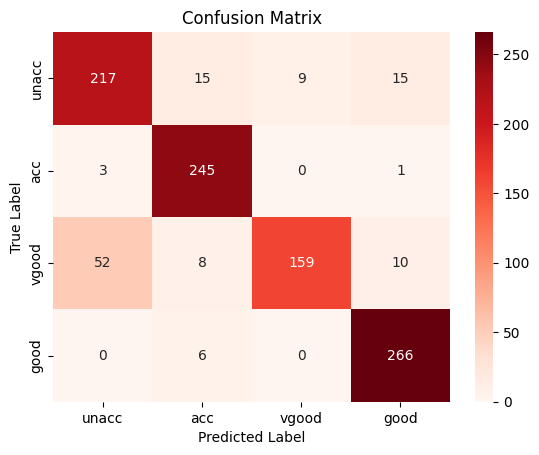

In [53]:
# Making Confusion Matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(output_test, output_pred)
print("Confusion Matrix:")
print(cm)

# Display classification report
report = classification_report(output_test, output_pred, target_names=['unacc', 'acc', 'vgood', 'good'])
print("\nClassification Report:")
print(report)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['unacc', 'acc', 'vgood', 'good'], yticklabels=['unacc', 'acc', 'vgood', 'good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [54]:
import numpy as np

# Create ten unseen sample arrays
unseen_data = np.array([
    [1, 3, 5, 3, 1, 0],  # Example 1 acc
    [2, 2, 4, 4, 2, 1],  # Example 2 unacc
    [0, 1, 3, 2, 0, 2],  # Example 3 unacc
    [3, 0, 2, 5, 1, 0],  # Example 4 unacc
    [1, 2, 4, 3, 2, 1],  # Example 5 unacc
    [2, 3, 5, 4, 0, 2],  # Example 6 good
    [0, 0, 2, 2, 1, 1],  # Example 7 unacc
    [3, 1, 3, 5, 2, 0],  # Example 8 acc
    [1, 1, 4, 4, 0, 2],  # Example 9 good
    [2, 0, 5, 3, 1, 1],  # Example 10 unacc
    [1, 2, 5, 3, 1, 0]   # Example 11 vgood
])

# Make predictions
predictions = knn.predict(unseen_data)

# Print predictions
for i, prediction in enumerate(predictions):
    print(f"Predicted class for unseen data {i+1}: {prediction}")

Predicted class for unseen data 1: vgood
Predicted class for unseen data 2: unacc
Predicted class for unseen data 3: unacc
Predicted class for unseen data 4: acc
Predicted class for unseen data 5: acc
Predicted class for unseen data 6: good
Predicted class for unseen data 7: unacc
Predicted class for unseen data 8: acc
Predicted class for unseen data 9: good
Predicted class for unseen data 10: unacc
Predicted class for unseen data 11: vgood


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
